# Implementation of MCP Neuron for AND and OR Function.

In [48]:
def MCP_Neurons_AND(X1, X2, T=2):
    """
    Implements basic AND operation using an MCP Neuron for two binary inputs.

    Parameters:
    X1 (1D numpy array): Array of binary values (0 or 1).
    X2 (1D numpy array): Array of binary values (0 or 1).
    T (int): Threshold value, default is 2 for AND logic.

    Returns:
    list: A list containing neuron states (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length."

    state_neuron = []  # Output list to store neuron states

    for i in range(len(X1)):
        sum_inputs = X1[i] + X2[i]  # Sum of inputs
        if sum_inputs >= T:
            state_neuron.append(1)  # Activate neuron
        else:
            state_neuron.append(0)  # Do not activate neuron

    return state_neuron


In [49]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [50]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []
    for i in range(len(X1)):
        sum_inputs = X1[i] + X2[i]
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [51]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


### • Question - 1: List out all the limitations of MCP - Neurons.

Binary Output: It produces only binary outputs (0 or 1), limiting its complexity.

Simple Threshold Function: It uses a basic threshold function, restricting its ability to model complex patterns.

No Learning Capability: It cannot adjust its weights based on input-output examples.

Only Linearly Separable Problems: It can only solve problems that are linearly separable.

Lack of Non-linearity: The step function doesn't model non-linear relationships.

No Backpropagation: It lacks the ability to adjust weights using backpropagation for training.


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### 1. Question - 1: What does the shape of X represent?

The shape of X represents the number of samples (rows) and the number of features (columns) in the dataset.

### Viewing the Dataset.

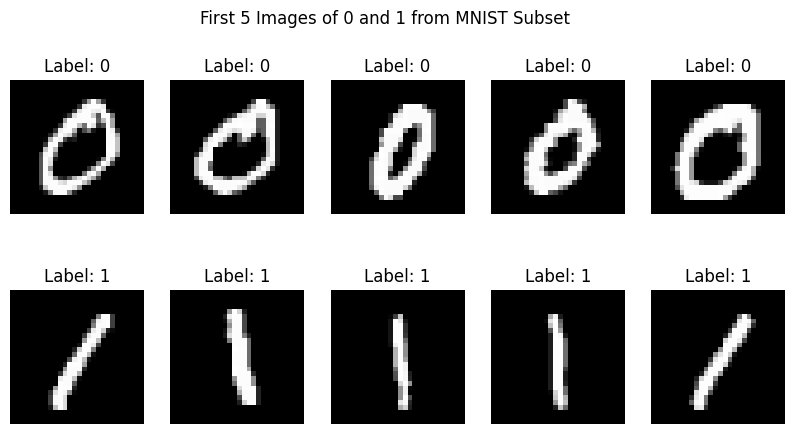

In [53]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [54]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

### 1. Question - 3: What does the weights array represent in this context?

The weights array represents the importance (or contribution) of each pixel in predicting whether an image belongs to class 0 or class 1 in a binary classification task.

X.shape[1] is 784, meaning there are 784 weights, one for each pixel in the 28×28 image.

Each weight determines how much influence a particular pixel has on the final prediction.

The weights are initialized to zero, meaning initially, all pixels contribute equally (or not at all) to the decision-making process.

During training, the weights are updated using an optimization algorithm (e.g., gradient descent) to minimize the error in classification.

### 2. Question - 4: Why are we initializing the weights to zero? What effect could this
have on the training process?

We initialize the weights to zero as a simple starting point for training. This ensures that all pixels start with an equal contribution to the prediction, and the model learns the appropriate weights through training.

Initializing weights to zero does not cause any issues because gradient descent will update the weights correctly.

Each weight gets different values based on the gradient of the loss function, allowing the model to learn properly.

## Step - 3 - Make a Decision function:

In [55]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [56]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy after training
    """
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            # Compute prediction using the step function
            linear_output = np.dot(X[i], weights) + bias
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if misclassification occurs
            if y_pred != y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]  # Update weights
                bias += update  # Update bias
            else:
                correct_predictions += 1  # Count correct predictions

        # Calculate accuracy
        accuracy = correct_predictions / n_samples

        # Print accuracy for each epoch (optional)
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.4f}")

        # Stop early if perfect accuracy is achieved
        if accuracy == 1.0:
            break

    return weights, bias, accuracy

## Training the Perceptron

In [57]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.9967
Epoch 2/100 - Accuracy: 0.9982
Epoch 3/100 - Accuracy: 0.9987
Epoch 4/100 - Accuracy: 0.9987
Epoch 5/100 - Accuracy: 0.9990
Epoch 6/100 - Accuracy: 0.9993
Epoch 7/100 - Accuracy: 0.9998
Epoch 8/100 - Accuracy: 0.9995
Epoch 9/100 - Accuracy: 0.9989
Epoch 10/100 - Accuracy: 0.9992
Epoch 11/100 - Accuracy: 0.9995
Epoch 12/100 - Accuracy: 0.9998
Epoch 13/100 - Accuracy: 1.0000
The Final Accuracy is:  1.0


### 1. Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

It is the formula to find weighted sum of x[i]. It is a dicision boundary equation.

### 2. Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?

When the perceptron makes a wrong prediction, it means that the predicted label (y_pred) is different from the actual label (y[i]).

The weights and bias are updated using the perceptron learning algorithm w = n x (y[i]-y_pred) * x[i].
where,
 w = weights
 n = learning_rate
 y = actual value
 y_pred = predicted value
 x[i] = current value

 then bias is update using the weight
 bias += w

 bias controls how much the weights change with each update.

### 3. Question - 7:Why is the final accuracy important, and what do you expect it to be?

If accuracy = 1.0, your data is likely linearly separable.
If accuracy < 1.0, consider feature engineering, tuning hyperparameters, or using a better model.

I expect it to be 100% accurate because the dataset is clear and there are only two classes 0 and 1. So, it is easier for perceptron model.

## Step 5: Visualize Misclassified Images

In [58]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


## 4.4 Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_3_5 = pd.read_csv("/content/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
A = df_3_5.drop(columns=["label"]).values  # 784 pixels
b = df_3_5["label"].values  # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", A.shape)
print("Label vector shape:", b.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


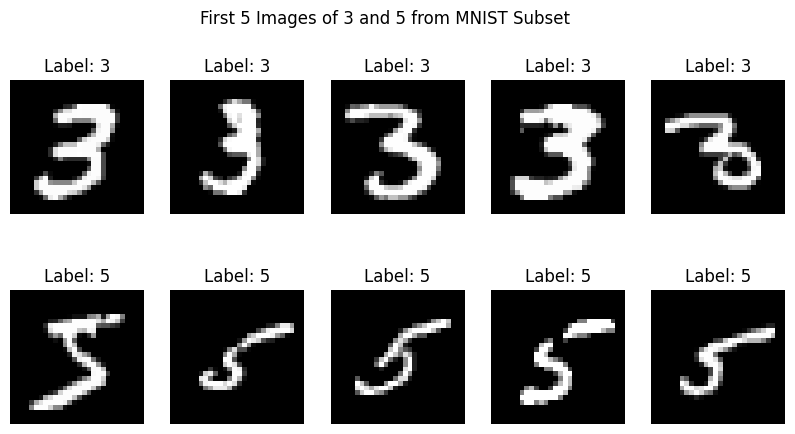

In [60]:
# Separate images for label 0 and label 1
images_3 = A[b == 3]  # Get all images with label 0
images_5 = A[b == 5]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [61]:
# Initialize weights and bias
w = np.zeros(A.shape[1])  # 784 weights (one for each pixel)
bia = 0
l_rate = 0.1
epo = 100

In [62]:
import numpy as np

def decision(A, w, bia):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(A, w) + bia
    #####Your Code Here############  # Activation function (step function)
    y_pred = np.where(predictions >= 0, 1, 0)
    return y_pred

In [63]:
import numpy as np

def train_perceptron_A(A, b, w, bia, l_r=0.1, epo=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy after training
    """
    n_samples = A.shape[0]

    for epo in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            # Compute prediction using the step function
            linear_output = np.dot(A[i], w) + bia
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if misclassification occurs
            if y_pred != y[i]:
                update = l_r * (y[i] - y_pred)
                w += update * X[i]  # Update weights
                bia += update  # Update bias
            else:
                correct_predictions += 1  # Count correct predictions

        # Calculate accuracy
        accur = correct_predictions / n_samples

        # Print accuracy for each epoch (optional)
        print(f"Epoch {epo+1}/{epochs} - Accuracy: {accur:.4f}")

        # Stop early if perfect accuracy is achieved
        if accur == 1.0:
            break

    return w, bia, accur

In [64]:
# After training the model with the perceptron_learning_algorithm
w, bia, accur = train_perceptron_A(A, b, w, bia)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accur)

Epoch 1/100 - Accuracy: 0.4940
Epoch 2/100 - Accuracy: 0.4962
Epoch 3/100 - Accuracy: 0.4973
Epoch 4/100 - Accuracy: 0.4973
Epoch 5/100 - Accuracy: 0.4980
Epoch 6/100 - Accuracy: 0.4991
Epoch 7/100 - Accuracy: 0.4991
Epoch 8/100 - Accuracy: 0.4995
Epoch 9/100 - Accuracy: 0.4995
Epoch 10/100 - Accuracy: 0.4991
Epoch 11/100 - Accuracy: 0.4991
Epoch 12/100 - Accuracy: 0.4995
Epoch 13/100 - Accuracy: 0.4995
Epoch 14/100 - Accuracy: 0.4995
Epoch 15/100 - Accuracy: 0.4995
Epoch 16/100 - Accuracy: 0.4995
Epoch 17/100 - Accuracy: 0.4995
Epoch 18/100 - Accuracy: 0.4998
Epoch 19/100 - Accuracy: 0.4995
Epoch 20/100 - Accuracy: 0.4998
Epoch 21/100 - Accuracy: 0.4995
Epoch 22/100 - Accuracy: 0.4991
Epoch 23/100 - Accuracy: 0.4995
Epoch 24/100 - Accuracy: 0.4991
Epoch 25/100 - Accuracy: 0.4991
Epoch 26/100 - Accuracy: 0.4991
Epoch 27/100 - Accuracy: 0.4991
Epoch 28/100 - Accuracy: 0.4991
Epoch 29/100 - Accuracy: 0.4991
Epoch 30/100 - Accuracy: 0.4995
Epoch 31/100 - Accuracy: 0.4991
Epoch 32/100 - Ac

Final Accuracy: 0.5910


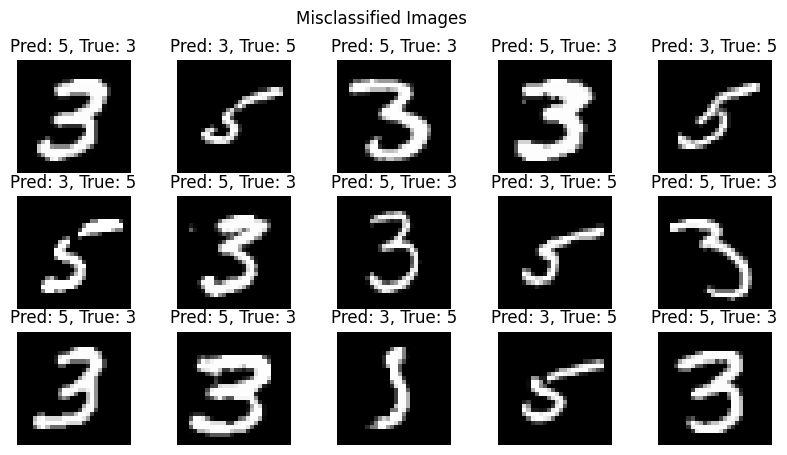

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Compute predictions
pred = np.dot(A, w) + bias  # Fix variable name: changed 'bia' to 'bias'
y_predic = np.where(pred >= 0, 3, 5)  # Step function for classification

# Calculate final accuracy
final_accur = np.mean(y_predic == b)  # Compare predictions with true labels
print(f"Final Accuracy: {final_accur:.4f}")

# Step 5: Visualize Misclassified Images
misclassified = np.where(y_predic != b)[0]  # Get indices of misclassified images
if len(misclassified) > 0:
    fig, axes = plt.subplots(3, 5, figsize=(10, 5))  # Create a 2x5 grid for images
    for ax, idx in zip(axes.flat, misclassified[:15]):  # Show up to 10 misclassified images
        ax.imshow(A[idx].reshape(28, 28), cmap="gray")  # Reshape back to 28x28
        ax.set_title(f"Pred: {y_predic[idx]}, True: {b[idx]}")  # Display prediction and true label
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")
